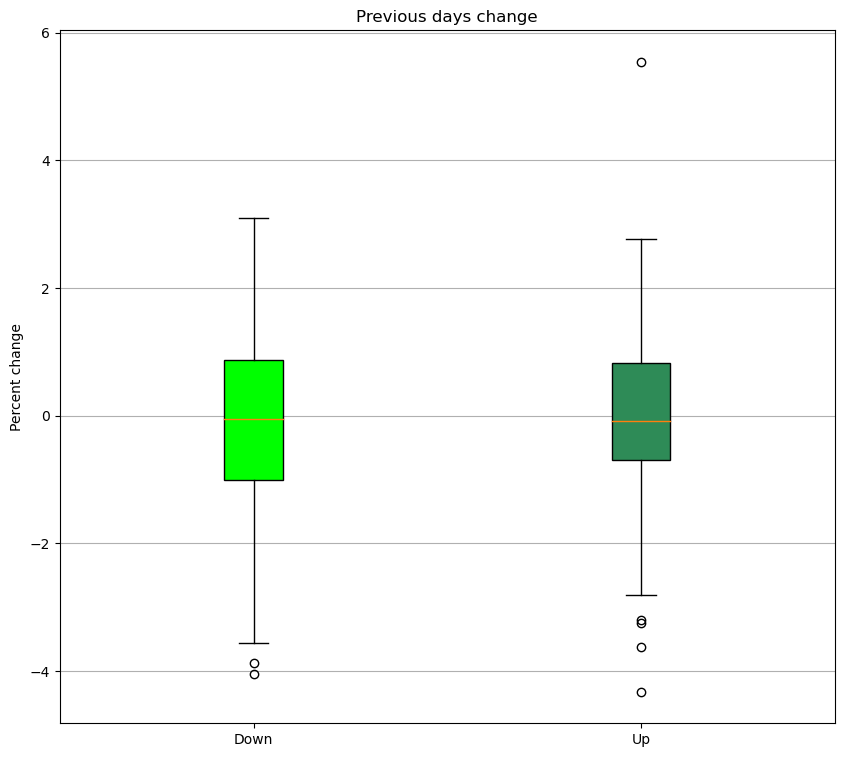

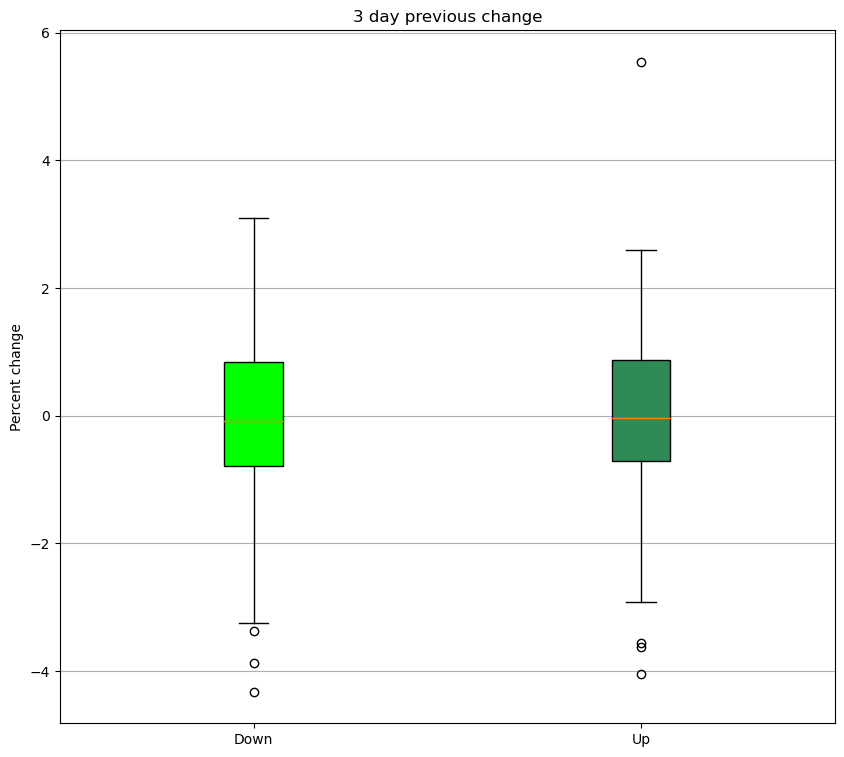

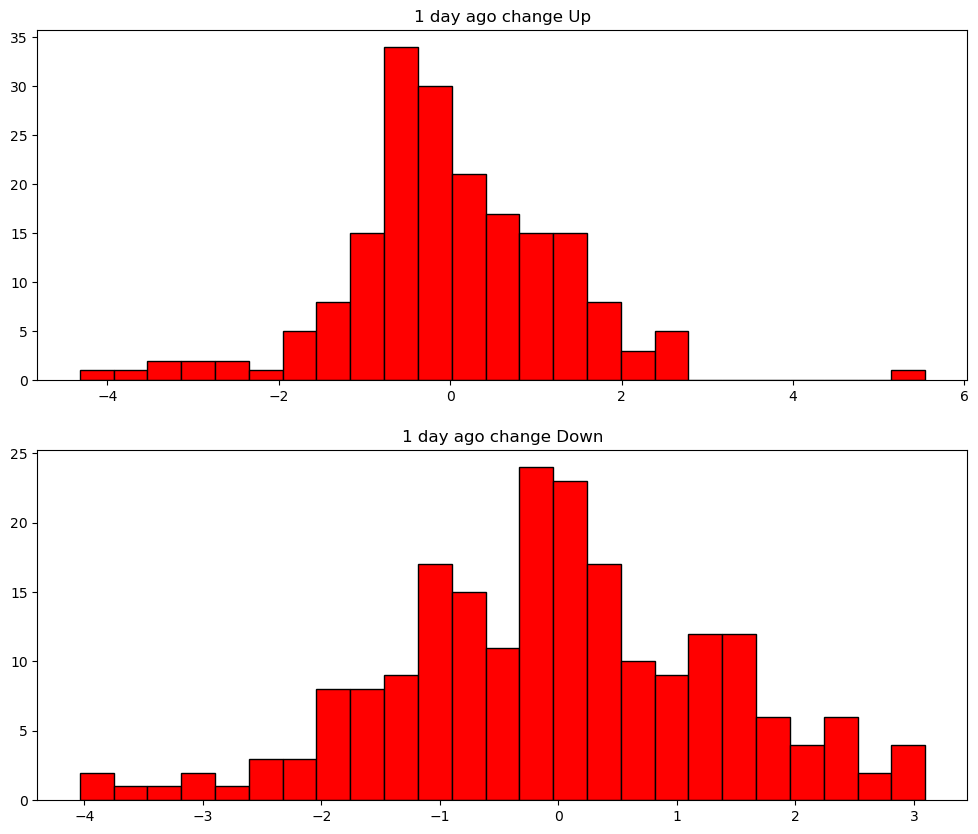

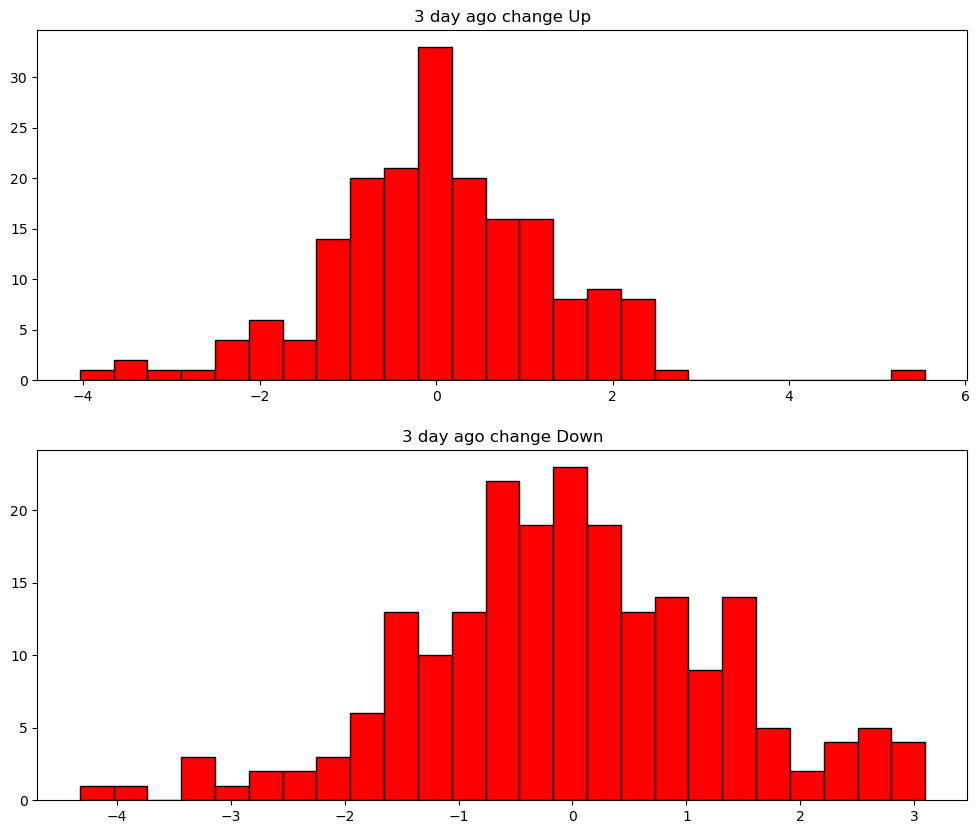


Summary statistics for 1 day previous change
      count      mean       std       min       25%       50%       75%  \
UD                                                                        
Down  210.0 -0.043894  1.367831 -4.039526 -1.002959 -0.050229  0.865238   
Up    186.0  0.035469  1.274880 -4.323661 -0.692489 -0.089602  0.819645   

           max  
UD              
Down  3.094787  
Up    5.543448  

 Skewness for the Up series
0.07354662988740703

 Skewness for the Down series
-0.11215359927757272

Kurtosis for the Up series
5.067044748271917

Kurtosis for the Down series
3.0878959660048397
Summary statistics for 3 day previous change
      count      mean       std       min       25%       50%       75%  \
UD                                                                        
Down  208.0 -0.035714  1.350573 -4.323661 -0.792578 -0.080381  0.849030   
Up    186.0  0.034724  1.299271 -4.039526 -0.712420 -0.039437  0.865238   

           max  
UD              
Down  3.0

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 20 20:29:50 2023

@author: ANEEK BANDYOPADHYAY
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from warnings import filterwarnings
import statistics
filterwarnings('ignore')
pd.set_option('display.max_column', None)
x=pd.read_excel('D:\\Upwork\\SPIndex.xlsx',sheet_name='Sheet1', usecols='A:G',skiprows=0,nrows=399)
def mp_data(data,n1,n2):
    x1=data.copy()
    UP_Down=[]
    prev_days_change=[]
    for i in range(0,n1):
        UP_Down.append(np.nan)
        prev_days_change.append(np.nan)
    for j in range(n1,len(data)):
        if (((x1.loc[j,"Adj_Close"]-x1.loc[j-1,"Adj_Close"])/x1.loc[j-1,"Adj_Close"])<0):
            UP_Down.append('Down')
        else:
            UP_Down.append('Up')
        b1=((x1.loc[j-n2,"Adj_Close"]-x1.loc[j-(n2+1),"Adj_Close"])/x1.loc[j-(n2+1),"Adj_Close"])*100
        prev_days_change.append(b1)
    x1['prev']=prev_days_change
    x1['UD']=UP_Down
    return(x1)
d_4=mp_data(x, 2, 1)
d_5=mp_data(x, 4, 3)
def crt_bx(d1,tt):
     d2=d1.copy()
     d3=d2.dropna(subset=['UD','prev'])
     G_D=[d3[d3['UD']==cat]['prev'] for cat in d3['UD'].unique()]
     fig, ax=plt.subplots(nrows=1, ncols=1,figsize=(10,9))
     bplot1=ax.boxplot(G_D,vert=True,patch_artist=True,labels=d3['UD'].unique())
     colors=['lime','seagreen']
     ax.set_title(tt)
     for bplot in [bplot1]:
         for patch, color in zip(bplot["boxes"],colors):
             patch.set_facecolor(color)
     for a1 in [ax]:
        a1.yaxis.grid(True)
        a1.set_ylabel('Percent change')
     plt.show()
crt_bx(d_4,'Previous days change')
crt_bx(d_5, '3 day previous change')
def crt_hi(d1, tt):
     n_bins=25
     prev_Up=d1.loc[d1['UD']=='Up','prev']
     prev_Down=d1.loc[d1['UD']=='Down','prev']
     fig, (ax0,ax1)=plt.subplots(figsize=(12,10), nrows=2,ncols=1)
     ax0.hist(prev_Up,n_bins,color='red',edgecolor='black')
     ax0.set_title(tt+' Up')
     ax1.hist(prev_Down,n_bins,color='red',edgecolor='black')
     ax1.set_title(tt+' Down')
     plt.show()
crt_hi(d_4, '1 day ago change')
crt_hi(d_5, '3 day ago change')
def sum_st(d1):
    print(d1['prev'].groupby(d1['UD']).describe()) 
    print("\n Skewness for the Up series")
    #print(d1['prev'].groupby(d1['UD']).skew())
    G_D=d1['prev'].groupby(d1['UD'])
    G_D_Up=G_D.get_group('Up')
    G_D_Down=G_D.get_group('Down')
    print(skew(G_D_Up,axis=None))
    print("\n Skewness for the Down series")
    print(skew(G_D_Down,axis=None))
    print("\nKurtosis for the Up series")
    print(kurtosis(G_D_Up,fisher=False,axis=None))
    print("\nKurtosis for the Down series")
    print(kurtosis(G_D_Down,fisher=False,axis=None))
print("\nSummary statistics for 1 day previous change")    
sum_st(d_4)
print("Summary statistics for 3 day previous change")
sum_st(d_5)    
def rem_ott(d2):
    prev_Up=d2.loc[d2['UD']=='Up','prev']
    lo_b=prev_Up.quantile(q=0.25)-(1.5*(prev_Up.quantile(q=0.75)-prev_Up.quantile(q=0.25)))
    up_b=prev_Up.quantile(q=0.75)+(1.5*(prev_Up.quantile(q=0.75)-prev_Up.quantile(q=0.25)))
    f_1=prev_Up[prev_Up.between(lo_b,up_b)]
    print("\nMedian of the Up series with outliers removed")
    print(f_1.quantile(q=0.5))
    print("Std. Deviation of the Up series with outliers removed")
    print(statistics.stdev(f_1))   
    print("Skewness of the Up series with outliers removed")
    #print(f_1.skew())
    print(skew(f_1,axis=None))
    print("Kurtosis of the Up series with outliers removed")
    print((kurtosis(f_1,fisher=False,axis=None)))
    prev_Down=d2.loc[d2['UD']=='Down','prev']
    lo_b1=prev_Down.quantile(q=0.25)-1.5*(prev_Down.quantile(q=0.75)-prev_Down.quantile(q=0.25))
    up_b1=prev_Down.quantile(q=0.75)+1.5*(prev_Down.quantile(q=0.75)-prev_Down.quantile(q=0.25))
    f_2=prev_Down[prev_Down.between(lo_b1,up_b1)]
    print("\nMedian of the Down series with outliers removed")
    print(f_2.quantile(q=0.5))
    print("Std. Deviation of the Down series with outliers removed")
    print(statistics.stdev(f_2))   
    print("Skewness of the Down series with outliers removed")
    #print(f_2.skew())
    print(skew(f_2,axis=None))
    print("Kurtosis of the Down series with outliers removed")
    print((kurtosis(f_2,fisher=False,axis=None)))
print("\n Descriptive statistics for 1 day prev change with outliers removed:")    
rem_ott(d_4)
print("\n Descriptive statistics for 3 day prev change with outliers removed:")    
rem_ott(d_5)